In [14]:
import pandas as pd
import numpy as np

In [4]:
df_a = pd.DataFrame(data=[[2.5, 2.0, 2.0], [2.0, 2.0, 2.0]], columns=list('ABC'))
df_b = pd.DataFrame(data=[[1.0, 6.0, 7.0, 1.0], [8.5, 1.0, 9.0, 1.0]], columns=list('CBDE'))

In [5]:
df_a

,A,B,C
0,2.5,2.0,2.0
1,2.0,2.0,2.0


In [6]:
df_b

,C,B,D,E
0,1.0,6.0,7.0,1.0
1,8.5,1.0,9.0,1.0


In [19]:
%%timeit
df = df_a.copy()
for x in df.columns:
    if x in df_b.columns:
        for i in range(len(df)):
            if df_b.loc[i, x] > df.loc[i, x]:
                df.loc[i, x] = df_b.loc[i, x]
df

760 µs ± 46.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
aa

In [18]:
%%timeit
df1 = df_a.copy()
for x in df1.columns:
    if x in df_b.columns:
        df1[x] = np.where(df_a[x] < df_b[x], df_b[x], df_a[x])
df1

707 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
np.where(df_a['B'] < df_b['B'], df_b['B'], df_a['B'])

array([6., 2.])

In [38]:
df_a = pd.DataFrame({'a': np.random.normal(size = 100000), 'b': np.random.normal(size = 100000),
                    'c': np.random.normal(size = 100000)})
df_b = pd.DataFrame({'c': np.random.normal(size = 100000), 'b': np.random.normal(size = 100000),
                    'd': np.random.normal(size = 100000), 'e': np.random.normal(size = 100000)})

In [22]:
df_a.head()

,a,b,c
0,0.837919,0.150241,2.186116
1,0.479641,0.379003,-0.120563
2,-1.716523,0.012681,-0.485913
3,0.613609,-0.011400,-0.172090
4,-1.424484,0.719305,-0.156362


In [23]:
df_b.head()

,c,b,d,e
0,0.452486,-0.063278,-0.664222,1.148110
1,-1.121852,-0.226820,-0.606297,-0.130598
2,-0.182037,0.353947,1.525607,0.093142
3,-0.995701,-0.076716,-0.505176,0.787645
4,-0.301254,1.898516,-0.737028,-0.370444


In [33]:
%%timeit
df = df_a.copy()
for x in df.columns:
    if x in df_b.columns:
        for i in range(len(df)):
            if df_b.loc[i, x] > df.loc[i, x]:
                df.loc[i, x] = df_b.loc[i, x]
df

213 ms ± 8.78 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%%timeit
df1 = df_a.copy()
for x in df1.columns:
    if x in df_b.columns:
        df1[x] = np.where(df_a[x] < df_b[x], df_b[x], df_a[x])
df1

533 µs ± 7.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
%%timeit
new_df = df_a.copy()
for col in df_a.columns:
    if col not in df_b.columns:
        continue
    new_df[col] = pd.concat([df_a[col], df_b[col]], axis=1).max(axis=1)
new_df

1.68 ms ± 27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
def max_common(df_a, df_b):
    new_df = df_a.copy()
    for col in df_a.columns:
        if col not in df_b.columns:
            continue
        new_df[col] = pd.concat([df_a[col], df_b[col]], axis=1).max(axis=1)
    return new_df

In [47]:
!pip install line_profiler

     |████████████████████████████████| 51kB 3.1MB/s eta 0:00:011
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for line-profiler: filename=line_profiler-3.1.0-cp36-cp36m-macosx_10_15_x86_64.whl size=53830 sha256=5f10ea11775da8221f0da804acb09f80e4f117ee6482dc20b255c3c04b536beb
  Stored in directory: /Users/jeffherman/Library/Caches/pip/wheels/28/ba/6e/e1686fd6ca7d0b0686e8fc4a7a1e3deff192a88d653756f9aa
Successfully built line-profiler


In [48]:
%load_ext line_profiler

In [56]:
%lprun -f max_common max_common(df_a, df_b)

#### def max_common1(df_a, df_b):
    df1 = df_a.copy()
    for x in df1.columns:
        if x in df_b.columns:
            df1[x] = np.where(df_a[x] < df_b[x], df_b[x], df_a[x])
    return df1

In [55]:
%lprun -f max_common1 max_common1(df_a, df_b)

In [31]:
import datetime as date
date.datetime.strptime('May 1 2015','%b %d %Y')

datetime.datetime(2015, 5, 1, 0, 0)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

Data from [here](https://data.kcmo.org/Crime/KCPD-Crime-Data-2019/pxaa-ahcm)

In [14]:
df = pd.read_csv('../../data/KCPD_Crime_Data_2019.csv')

In [15]:
df.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
0,KC19019972,03/19/2019,08:48,03/19/2019,08:48,03/19/2019,09:33,Vehicular – Non-Injury,NaN,NaN,...,64161.0,PC1239,SCP,N,ARR CHA VDR,W,F,41.0,False,NaN
1,KC19020439,03/20/2019,17:11,03/20/2019,17:30,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,...,64068.0,NaN,OSPD,N,ARR CHA SUS,W,M,31.0,False,NaN
2,KC19021179,03/23/2019,09:40,03/23/2019,09:40,NaN,NaN,Vehicular – Injury,NaN,NaN,...,64155.0,PC0277,NPD,N,ARR CHA VDR,W,M,41.0,False,NaN
3,KC19021555,03/25/2019,07:35,03/25/2019,09:09,NaN,NaN,Possession/Sale/Distribution of a Controlled S...,35A,Drug / Narcotic Violations,...,64108.0,PJ1831,CPD,N,ARR CHA SUS,B,M,31.0,False,NaN
4,KC19021815,03/26/2019,06:04,03/26/2019,07:20,03/26/2019,08:00,Stealing – Shoplift,23C,Shoplifting,...,64133.0,PJ3601,EPD,N,VIC,NaN,NaN,NaN,False,NaN


In [16]:
df.shape

(78046, 23)

### What is a Time Series?

A time series is a sequence of numerical data points in successive order.

In [17]:
df[df['Reported_Date'] == '03/19/2019']

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
0,KC19019972,03/19/2019,08:48,03/19/2019,08:48,03/19/2019,09:33,Vehicular – Non-Injury,NaN,NaN,...,64161.0,PC1239,SCP,N,ARR CHA VDR,W,F,41.0,False,NaN
674,KC19019969,03/19/2019,08:57,03/17/2019,04:13,NaN,NaN,Stealing from Auto (Theft from Auto),23F,Theft From Motor Vehicle,...,64116.0,PC1248,NPD,N,CMP VIC,W,M,55.0,False,3900 N CENTRAL ST\nKANSAS CITY 64116\n(39.164...
822,KC19020110,03/19/2019,16:20,03/19/2019,16:20,NaN,NaN,Domestic Violence Assault (Non-Aggravated),13B,Simple Assault,...,64157.0,PC0213,SCP,Y,ARR CHA SUS,W,M,NaN,False,9600 NE 98TH ST\nKANSAS CITY 64157\n(39.27089...
1134,KC19020048,03/19/2019,12:14,03/18/2019,22:00,03/19/2019,12:14,Domestic Violence Assault (Non-Aggravated),13A,Aggravated Assault,...,64118.0,PC0599,NPD,Y,VIC,W,F,43.0,False,6200 N PENNSYLVANIA DR\nKANSAS CITY 64118\n(3...
1276,KC19020191,03/19/2019,19:34,03/19/2019,19:29,NaN,NaN,Trespass of Real Property,90J,Trespass of Real Property,...,64117.0,PC1221,SCP,N,ARR CHA SUS,W,F,30.0,False,2600 NE 42ND ST\nKANSAS CITY 64117\n(39.16972...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16642,KC19020050,03/19/2019,12:56,01/14/2019,16:19,02/19/2019,14:18,Fraudulent Use of a Credit Device,26B,Credit Card / Automatic Teller,...,64118.0,PC0844,SCP,N,VIC,NaN,NaN,NaN,False,2500 NE VIVION RD\nKANSAS CITY 64118\n(39.185...
16645,KC19020181,03/19/2019,19:58,03/04/2019,15:30,03/04/2019,20:00,Stealing – Other,23H,All Other Larceny,...,64151.0,NaN,NPD,N,VIC,W,M,27.0,False,8300 N ST CLAIR AVE\nKANSAS CITY 64151\n(39.2...
16733,KC19020211,03/19/2019,21:03,03/19/2019,21:03,NaN,NaN,Stealing – Shoplift,23C,Shoplifting,...,64157.0,PC0282,SCP,N,ARR CHA,W,M,34.0,False,8500 N CHURCH RD\nKANSAS CITY 64157\n(39.2460...
16803,KC19020007,03/19/2019,10:56,12/23/2018,15:58,03/19/2019,10:00,Harassment / Intimidation - Sex Crimes,NaN,NaN,...,64119.0,PC0957,SCP,N,VIC,W,F,38.0,False,4900 N FREMONT AVE\nKANSAS CITY 64119\n(39.18...


In [18]:
df['Offense'].value_counts().head()

Domestic Violence Assault (Non-Aggravated)    6232
Assault (Aggravated)                          4558
Stolen Auto                                   4504
Stealing – Shoplift                           4435
Property Damage                               4344
Name: Offense, dtype: int64

In [19]:
df_pd = df[df['Offense'] == 'Property Damage'].copy()
df_pd.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
5,KC19021991,03/26/2019,17:49,03/25/2019,20:10,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,...,64133.0,NaN,MPD,N,VIC,B,M,61.0,False,NaN
33,KC19024382,04/04/2019,08:27,04/03/2019,20:56,04/03/2019,21:04,Property Damage,290,Vandalism/Destruction of Property,...,64108.0,PJ2072,CPD,N,VIC,NaN,NaN,NaN,False,NaN
47,KC19026110,04/10/2019,14:36,04/05/2019,12:30,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,...,64118.0,PC1221,SCP,N,VIC,NaN,NaN,NaN,False,NaN
66,KC19027946,04/17/2019,09:07,04/15/2019,18:00,04/15/2019,23:50,Property Damage,290,Vandalism/Destruction of Property,...,64119.0,PC1231,SCP,N,VIC,W,M,69.0,False,NaN
145,KC19037132,05/20/2019,10:54,05/10/2019,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,...,64127.0,NaN,EPD,N,SUS,B,M,NaN,False,NaN


In [20]:
df_pd.columns

Index(['Report_No', 'Reported_Date', 'Reported_Time', 'From_Date', 'From_Time',
       'To_Date', 'To_Time', 'Offense', 'IBRS', 'Description', 'Beat',
       'Address', 'City', 'Zip Code', 'Rep_Dist', 'Area', 'DVFlag',
       'Involvement', 'Race', 'Sex', 'Age', 'Firearm Used Flag', 'Location'],
      dtype='object')

In [21]:
df_pd.isnull().sum()

Report_No               0
Reported_Date           0
Reported_Time           0
From_Date               0
From_Time               0
To_Date              2413
To_Time              2418
Offense                 0
IBRS                  341
Description           341
Beat                   76
Address                 0
City                    0
Zip Code              801
Rep_Dist             1599
Area                  118
DVFlag                  0
Involvement             0
Race                  796
Sex                   752
Age                  1119
Firearm Used Flag       0
Location              595
dtype: int64

In [22]:
df_pd.set_index('Reported_Date', inplace = True)
df_pd.head()

,Report_No,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
Reported_Date,,,,,,,,,,,,,,,,,,,,,
03/26/2019,KC19021991,17:49,03/25/2019,20:10,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,212,...,64133.0,NaN,MPD,N,VIC,B,M,61.0,False,NaN
04/04/2019,KC19024382,08:27,04/03/2019,20:56,04/03/2019,21:04,Property Damage,290,Vandalism/Destruction of Property,115,...,64108.0,PJ2072,CPD,N,VIC,NaN,NaN,NaN,False,NaN
04/10/2019,KC19026110,14:36,04/05/2019,12:30,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,632,...,64118.0,PC1221,SCP,N,VIC,NaN,NaN,NaN,False,NaN
04/17/2019,KC19027946,09:07,04/15/2019,18:00,04/15/2019,23:50,Property Damage,290,Vandalism/Destruction of Property,632,...,64119.0,PC1231,SCP,N,VIC,W,M,69.0,False,NaN
05/20/2019,KC19037132,10:54,05/10/2019,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,331,...,64127.0,NaN,EPD,N,SUS,B,M,NaN,False,NaN


In [23]:
df_pd.resample('D').count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [24]:
df_pd.index

Index(['03/26/2019', '04/04/2019', '04/10/2019', '04/17/2019', '05/20/2019',
       '05/25/2019', '05/27/2019', '06/15/2019', '06/16/2019', '06/18/2019',
       ...
       '12/24/2019', '12/14/2019', '12/04/2019', '12/09/2019', '11/26/2019',
       '12/13/2019', '12/18/2019', '12/12/2019', '11/20/2019', '12/17/2019'],
      dtype='object', name='Reported_Date', length=4344)

In [26]:
df_pd.index = pd.to_datetime(df_pd.index)
df_pd.index

DatetimeIndex(['2019-03-26', '2019-04-04', '2019-04-10', '2019-04-17',
               '2019-05-20', '2019-05-25', '2019-05-27', '2019-06-15',
               '2019-06-16', '2019-06-18',
               ...
               '2019-12-24', '2019-12-14', '2019-12-04', '2019-12-09',
               '2019-11-26', '2019-12-13', '2019-12-18', '2019-12-12',
               '2019-11-20', '2019-12-17'],
              dtype='datetime64[ns]', name='Reported_Date', length=4344, freq=None)

In [27]:
df_pd.resample('D').count()

,Report_No,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
Reported_Date,,,,,,,,,,,,,,,,,,,,,
2019-03-18,2,2,2,2,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2019-03-19,2,2,2,2,0,0,2,2,2,2,...,2,2,2,2,2,1,1,1,2,0
2019-03-20,3,3,3,3,0,0,3,3,3,3,...,2,2,3,3,3,2,3,2,3,3
2019-03-21,4,4,4,4,2,2,4,4,4,4,...,4,4,4,4,4,4,4,4,4,1
2019-03-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,16,16,16,16,7,7,16,13,13,16,...,14,9,16,16,16,13,13,11,16,15
2019-12-28,8,8,8,8,5,5,8,8,8,8,...,6,4,8,8,8,6,6,6,8,7
2019-12-29,24,24,24,24,13,13,24,17,17,24,...,19,10,24,24,24,20,20,16,24,15


In [28]:
df_pd.resample('D')['Report_No'].count()

Reported_Date
2019-03-18     2
2019-03-19     2
2019-03-20     3
2019-03-21     4
2019-03-22     0
              ..
2019-12-27    16
2019-12-28     8
2019-12-29    24
2019-12-30     5
2019-12-31    13
Freq: D, Name: Report_No, Length: 289, dtype: int64

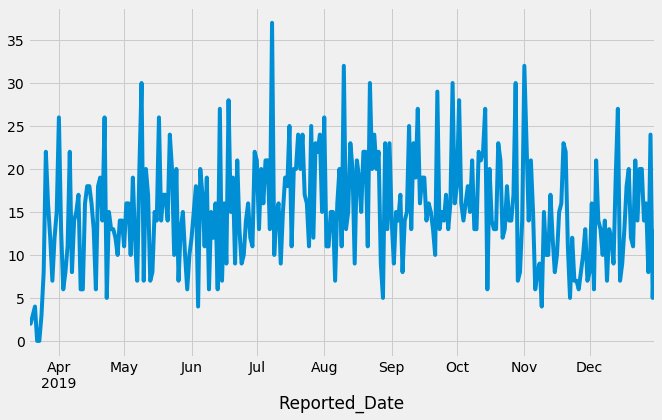

In [30]:
with plt.style.context('fivethirtyeight'):
    df_pd.resample('D')['Report_No'].count().plot(kind = 'line', figsize = (10, 6))

In [31]:
df_daily = df_pd.resample('D')['Report_No'].count()
df_daily.head()

Reported_Date
2019-03-18    2
2019-03-19    2
2019-03-20    3
2019-03-21    4
2019-03-22    0
Freq: D, Name: Report_No, dtype: int64

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


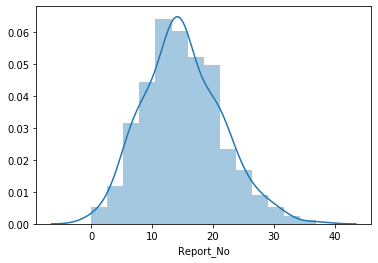

In [32]:
import seaborn as sns 

sns.distplot(df_daily)

## Stationarity

A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time. 

Why is it important? Because most time series models work on the assumption that **the time series are stationary**.

Here's a dataset from Learn.co, lets see how it does with the Dickey Fuller Test 

In [45]:
roll_mean = df_daily.rolling(window = 7).mean()
roll_std = df_daily.rolling(window = 7).std()

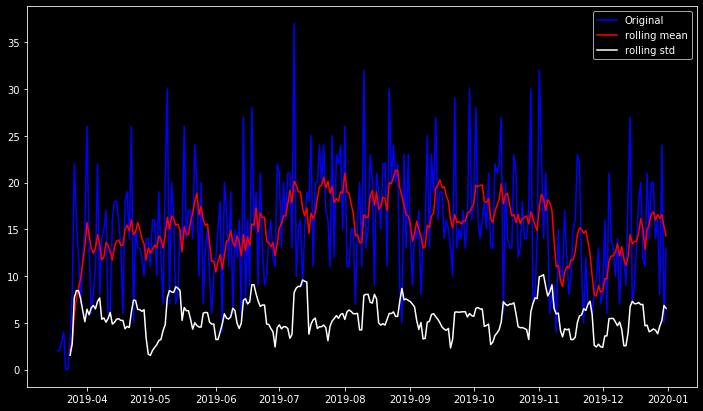

In [46]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize = (12, 7))
    plt.plot(df_daily, color = 'blue', label = 'Original')
    plt.plot(roll_mean, color = 'red', label = 'rolling mean')
    plt.plot(roll_std, color = 'white', label = 'rolling std')
    plt.legend()

In [47]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_daily)

(-7.7106814559145995,
 1.2663057571335847e-11,
 2,
 286,
 {'1%': -3.4534232986669546,
  '5%': -2.8716994185534745,
  '10%': -2.5721833625116144},
 1753.5811441101437)

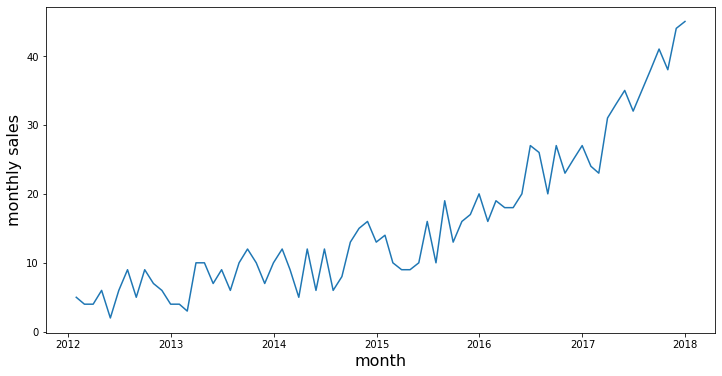

In [48]:
import numpy as np

years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts = data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel('month', fontsize=16)
plt.ylabel('monthly sales', fontsize=16)
plt.show()

In [51]:
data[:5]

2012-01-31    5
2012-02-29    4
2012-03-31    4
2012-04-30    6
2012-05-31    2
Freq: M, dtype: int64

In [52]:
data.diff(periods = 1)[:5]

2012-01-31    NaN
2012-02-29   -1.0
2012-03-31    0.0
2012-04-30    2.0
2012-05-31   -4.0
Freq: M, dtype: float64

In [54]:
adfuller(data.diff(periods = 1).dropna())

(-6.455929660591098,
 1.4835154528971145e-08,
 2,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 311.5103050425881)

In [50]:
adfuller(data)

(3.761375741674094,
 1.0,
 8,
 63,
 {'1%': -3.5386953618719676,
  '5%': -2.9086446751210775,
  '10%': -2.591896782564878},
 314.84474355172597)

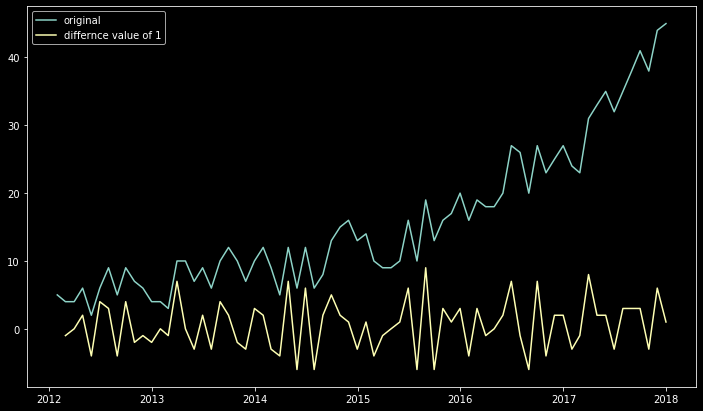

In [57]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize = (12, 7))
    plt.plot(data, label = 'original')
    plt.plot(data.diff(periods = 1), label = 'differnce value of 1')
    plt.legend()
    plt.show()

Examples of [Non-Stationarity](https://learn.co/tracks/module-4-data-science-career-2-1/big-data-deep-learning-and-natural-language-processing/section-37-working-with-time-series-data/types-of-trends)

<img src="images/trendseasonal.png" alt="Drawing" style="width: 800px;"/>

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [85]:
decomposition = seasonal_decompose(df_daily, )

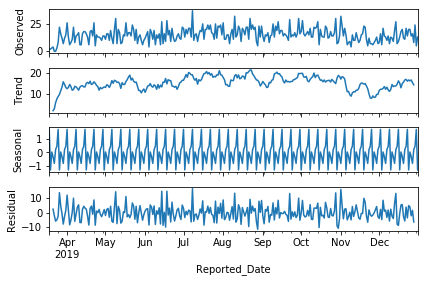

In [63]:
decomposition.plot();

In [65]:
decomposition.seasonal[:14]

Reported_Date
2019-03-18    1.696653
2019-03-19   -1.285490
2019-03-20    0.035938
2019-03-21   -0.306135
2019-03-22   -0.804393
2019-03-23    0.206060
2019-03-24    0.457367
2019-03-25    1.696653
2019-03-26   -1.285490
2019-03-27    0.035938
2019-03-28   -0.306135
2019-03-29   -0.804393
2019-03-30    0.206060
2019-03-31    0.457367
Freq: D, Name: Report_No, dtype: float64

In [67]:
pd_daily = pd.DataFrame(df_daily)
pd_daily['Day_of_Week'] = pd_daily.index.day_name()

In [69]:
pd_daily.head(7)

,Report_No,Day_of_Week
Reported_Date,,
2019-03-18,2,Monday
2019-03-19,2,Tuesday
2019-03-20,3,Wednesday
2019-03-21,4,Thursday
2019-03-22,0,Friday
2019-03-23,0,Saturday
2019-03-24,3,Sunday


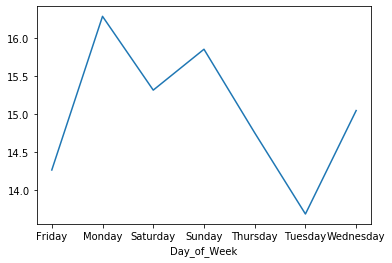

In [73]:
pd_daily.groupby('Day_of_Week')['Report_No'].mean().plot(kind = 'line')

In [74]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
mapping

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [75]:
df_dow = pd_daily.groupby('Day_of_Week')['Report_No'].mean()
df_dow

Day_of_Week
Friday       14.268293
Monday       16.285714
Saturday     15.317073
Sunday       15.853659
Thursday     14.756098
Tuesday      13.690476
Wednesday    15.048780
Name: Report_No, dtype: float64

In [83]:
pd_daily.mean()

Report_No    15.031142
dtype: float64

In [77]:
key = df_dow.index.map(mapping)

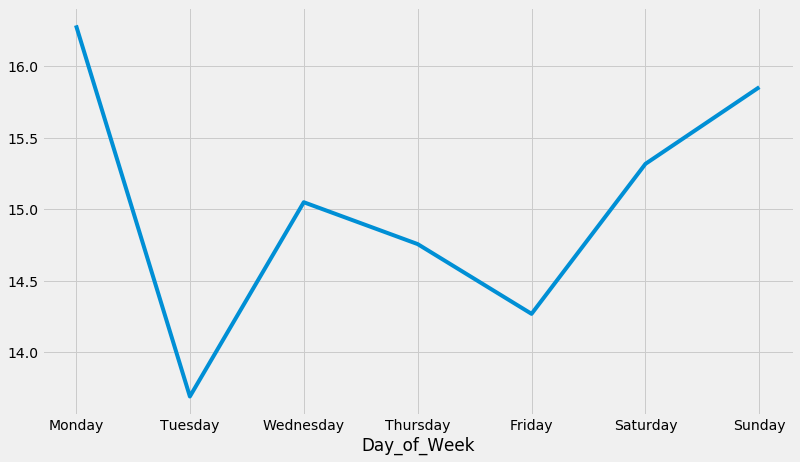

In [81]:
with plt.style.context('fivethirtyeight'):
    df_dow.iloc[key.argsort()].plot(kind = 'line', figsize = (12, 7))

## Further Details 
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/#:~:text=Trend%3A%20The%20increasing%20or%20decreasing,random%20variation%20in%20the%20series.